In [1]:
!pip install scikit-learn==0.19

     |████████████████████████████████| 12.4MB 6.2MB/s eta 0:00:01
ERROR: category-encoders 2.0.0 has requirement scikit-learn>=0.20.0, but you'll have scikit-learn 0.19.0 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.19.0 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a080bc4a12564f8284064396f1a9eff5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AUQDsa2PaH5FiSfL9ds7R27GV405SrAcUutHZUCHk_fC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a080bc4a12564f8284064396f1a9eff5.get_object(Bucket='windpowerprediction-donotdelete-pr-2nsm7vhshvhqax',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body,encoding='unicode_escape',sep='\t')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Collected Data From Kaggle

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
x= data.iloc[:,2:5].values
y=data.iloc[:,1].values

In [6]:
sklearn.__version__

'0.19.0'

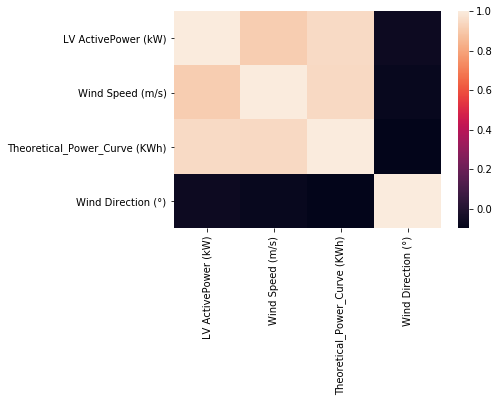

In [7]:
sns.heatmap(data.corr())

# Now Let's See Data In Graphical Form

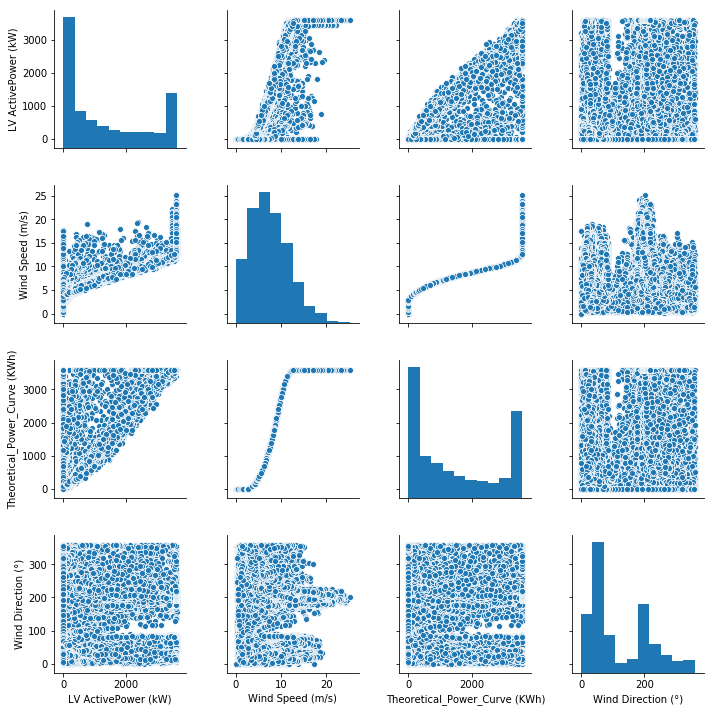

In [8]:
sns.pairplot(data)

# See Data Is Not Normally Distributed
So We Scale Down Data

# GRAPH : Theoretical_Power_Curve (KWh) And "LV ActivePower (kW)

(50530,)
(50530,)


Text(0, 0.5, 'LV ActivePower (kW)')

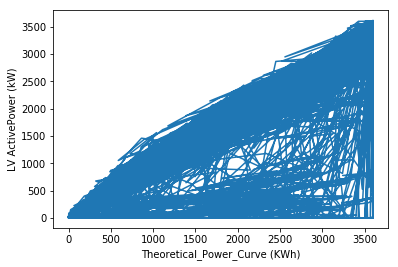

In [10]:
print(x[:,1].shape)
print(y.shape)
plt.plot(x[:,1],y)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("LV ActivePower (kW)")

# GRAPH :   "Wind Direction (°)" And "LV ActivePower (kW)"

Text(0, 0.5, 'LV ActivePower (kW)')

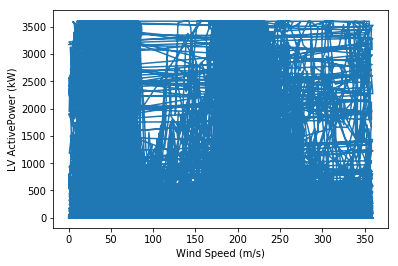

In [11]:
plt.plot(x[:,2],y)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")

# Graph : "Wind Spedd(ms)" And "LV ActivePower (kW)"

Text(0, 0.5, 'LV ActivePower (kW)')

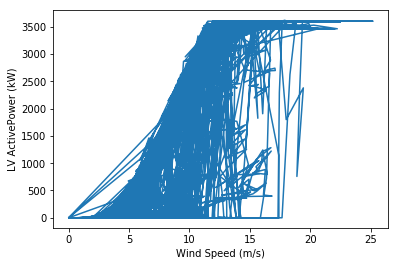

In [12]:
plt.plot(x[:,0],y)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")

In [13]:
from datetime import datetime
datetime.strptime("2012-may-31 19:00", "%Y-%b-%d %H:%M")
datetime.strptime("01 01 2018 00:00", "%d %m %Y %H:%M")

datetime.datetime(2018, 1, 1, 0, 0)

In [14]:
mydate = data.iloc[:,0].values
mynewdate = [None] * 50530
#print(mynewdate.shape)
for i in range(50530):
    mynewdate[i] = datetime.strptime(mydate[i],"%d %m %Y %H:%M")

In [18]:
import numpy as np
new_x = np.array([mynewdate])
new_x.shape
new_x = new_x.reshape((50530,))
new_x.shape

(50530,)

#  GRAPH : LV Active Power with respect to time

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


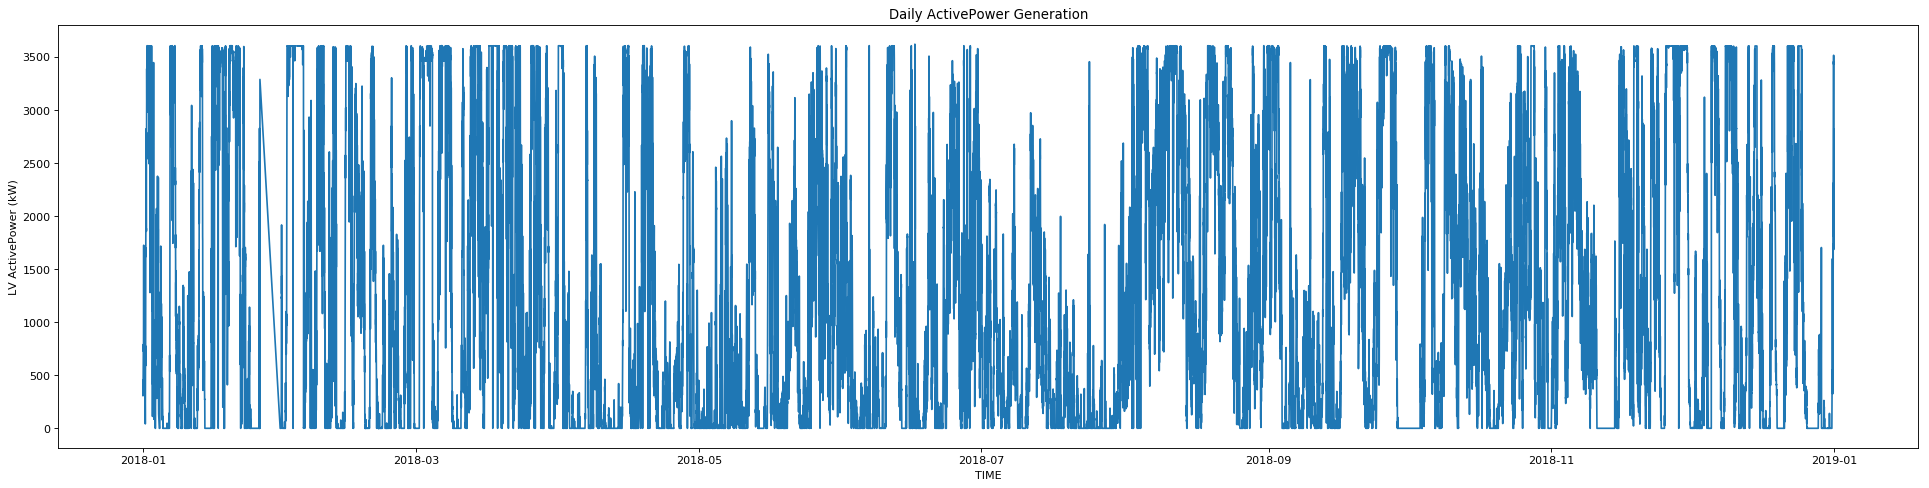

In [20]:
figure(num=None, figsize=(30, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(new_x,y)
plt.xlabel("TIME")
plt.ylabel("LV ActivePower (kW)")
plt.title("Daily ActivePower Generation")
plt.show()


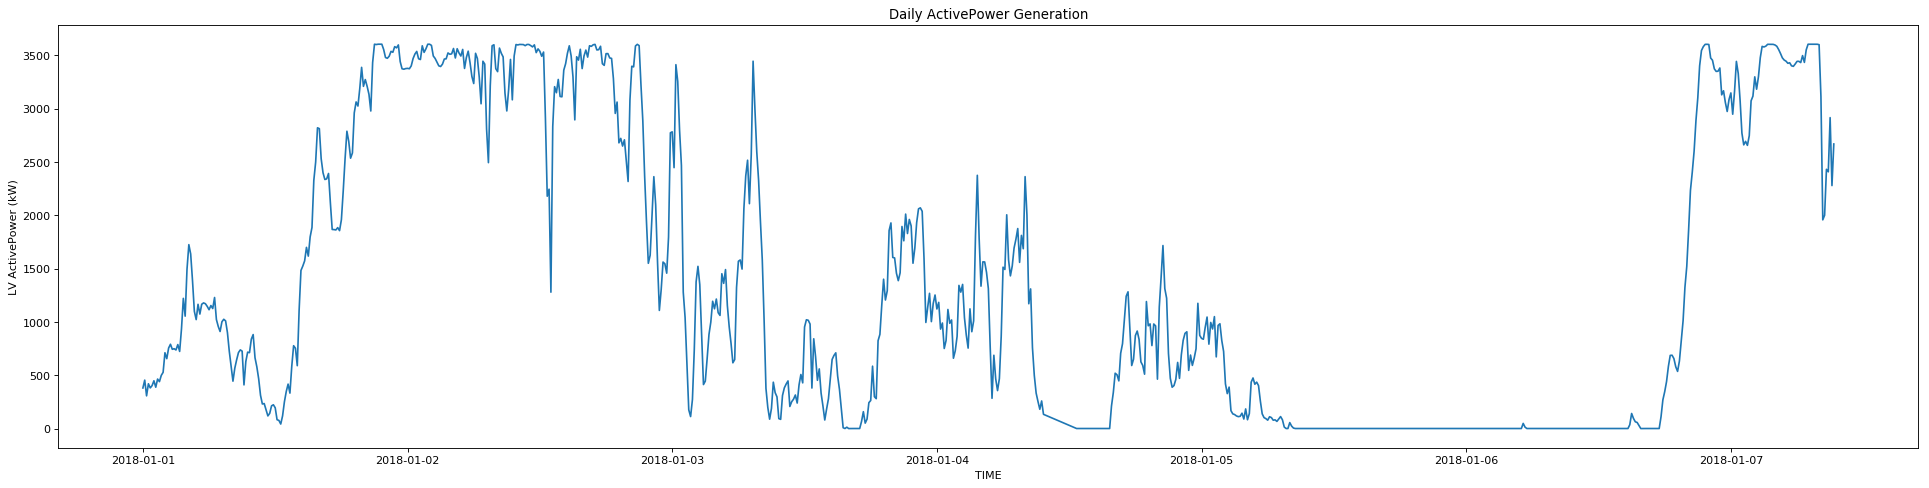

In [21]:
newx= new_x[0:900]
newy = y[0:900]
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 7), dpi=80, facecolor='w', edgecolor='r')
plt.plot(newx,newy)
plt.xlabel("TIME")
plt.ylabel("LV ActivePower (kW)")
plt.title("Daily ActivePower Generation")
plt.show()

In [22]:
# Create New Feature
x1 = x[:,0] * 5/18
x1.shape
# (50530,)
data['wind KM/Hr'] = x1
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),wind KM/Hr
0,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904,1.475371
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,1.575602
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,1.448899
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087,1.572132
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,1.549428


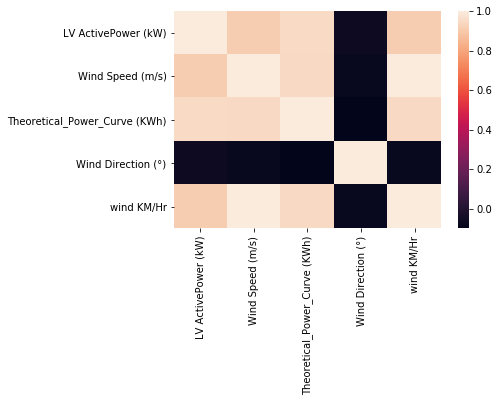

In [23]:
sns.heatmap(data.corr())

In [24]:
data.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),wind KM/Hr
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702,0.912774
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188,1.000000
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076,0.944209
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000,-0.077188
wind KM/Hr,0.912774,1.000000,0.944209,-0.077188,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 6 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
wind KM/Hr                       50530 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.3+ MB


In [26]:
# As we can see from above graph data is not narmalized, So we will use MinMaxScaler to scale the Data
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
from sklearn.preprocessing import MinMaxScaler
scale1= MinMaxScaler()
scale2 = MinMaxScaler()
xscaled= scale1.fit_transform(x)
y= y.reshape(-1,1)
yscaled=scale2.fit_transform(y)

In [27]:
y

array([[ 380.0477905],
       [ 453.7691956],
       [ 306.3765869],
       ...,
       [2201.106934 ],
       [2515.694092 ],
       [2820.466064 ]])

In [28]:
yscaled

array([[0.10563314],
       [0.1259914 ],
       [0.08528875],
       ...,
       [0.60852085],
       [0.69539448],
       [0.77955763]])

In [30]:
from sklearn.model_selection import train_test_split
X_trainscaled, X_testscaled, y_trainscaled, y_testscaled = train_test_split(xscaled, yscaled, test_size=0.15,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)

# Building Pipelining

In [31]:
pipelineLR=Pipeline([('LR_classifier',LinearRegression())])
pipelineSVM=Pipeline([('SVM_classifier',svm.SVR())])
pipelineXGB=Pipeline([('XGB_classifier',xg.XGBRegressor())])

In [32]:
pipelines = [pipelineLR, pipelineSVM, pipelineXGB]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [33]:
pipe_dict = {0: 'Linear Regression', 1: 'SVM', 2: 'XGBoost'}

In [34]:
#Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_trainscaled, y_trainscaled)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_testscaled,y_testscaled)))

Linear Regression Test Accuracy: 0.9021253354853129
SVM Test Accuracy: 0.8968093080748542
XGBoost Test Accuracy: 0.9156742243335151


In [36]:
model=xg.XGBRegressor()

In [37]:
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
y

array([[ 380.0477905],
       [ 453.7691956],
       [ 306.3765869],
       ...,
       [2201.106934 ],
       [2515.694092 ],
       [2820.466064 ]])

In [39]:
y_pred = model.predict(x)
y_pred

array([ 351.19095,  427.65448,  317.2196 , ..., 1566.071  , 2070.7537 ,
       2255.9358 ], dtype=float32)

In [40]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Building NN

In [41]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=3, input_dim=3))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [42]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=5)

In [43]:
results=regressor.fit(X_trainscaled,y_trainscaled)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
42950/42950 [==============================] - 2s 49us/step - loss: 0.0220 - mean_absolute_error: 0.0889 - acc: 2.3283e-05
Epoch 2/5
42950/42950 [==============================] - 2s 35us/step - loss: 0.0126 - mean_absolute_error: 0.0548 - acc: 2.3283e-05
Epoch 3/5
42950/42950 [==============================] - 1s 34us/step - loss: 0.0125 - mean_absolute_error: 0.0530 - acc: 2.3283e-05
Epoch 4/5
42950/42950 [==============================] - 2s 37us/step - loss: 0.0124 - mean_absolute_error: 0.0520 - acc: 2.3283e-05
Epoch 5/5
42950/42950 [==============================] - 2s 37us/step - loss: 0.0124 - mean_absolute_error: 0.0516 - acc: 2.3283e-05


In [44]:
y_predscaled= regressor.predict(X_testscaled)
y_predscaled=y_predscaled.reshape(-1,1)
print(y_predscaled[0])
y_pred_inverse_scale = scale2.inverse_transform(y_predscaled)
print(y_test[0])
y_test_inverse_scale = scale2.inverse_transform(y_testscaled)
y_test_inverse_scale[1]
# Result
y_pred_inverse_scale[1]

[0.8394024]
[3348.910889]


array([2616.5476], dtype=float32)

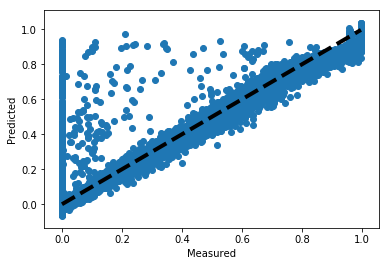

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_testscaled, y_predscaled)
ax.plot([y_testscaled.min(), y_testscaled.max()], [y_testscaled.min(), y_testscaled.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [47]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [49]:
wml_credientials = {
  "apikey": "zVaOw8hdN2LPBOonkfo87D_be0eswxeoneNu5Q1q1X0a",
  "iam_apikey_description": "Auto-generated for key 89050668-9c63-4316-be95-d2d04bc4ba4a",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/30db80e933a740d4907e2d1fe83e38ea::serviceid:ServiceId-fc1192e0-70a7-4113-bde1-5abc761f17e4",
  "instance_id": "384fab1d-7994-43bb-9cfd-9b064756482b",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}
  


In [50]:
client = WatsonMachineLearningAPIClient(wml_credientials)

In [51]:
metadata = {
    client.repository.ModelMetaNames.NAME : 'Wind Predication',
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Aleena Umar',
    client.repository.ModelMetaNames.AUTHOR_EMAIL : 'si05202001322@smartinternz.com'
}

In [52]:
stored_data = client.repository.store_model(model,meta_props = metadata)

In [53]:
guid = client.repository.get_model_uid(stored_data)

In [54]:
deploy = client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: 'ff722eff-dfb1-4da6-b8da-ac10c64c5700' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dde44d34-99b0-4f8b-a9ee-cbcd8213ef14'
------------------------------------------------------------------------------------------------




In [55]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
dde44d34-99b0-4f8b-a9ee-cbcd8213ef14  Artifact deployment  online  DEPLOY_SUCCESS  2020-07-07T10:46:55.842Z  scikit-learn-0.19  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [56]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)

In [57]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/384fab1d-7994-43bb-9cfd-9b064756482b/deployments/dde44d34-99b0-4f8b-a9ee-cbcd8213ef14/online'